In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from config import (user, password, host, port, database)

In [2]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
engine = create_engine(f'postgresql://{user}:{password}@{host}:{port}/{database}')
conn = engine.connect()

In [3]:
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['titles', 'salaries', 'employees', 'departments', 'dept_manager', 'dept_emp']

In [4]:
Salaries = Base.classes.salaries
Departments = Base.classes.departments
Dept_Emp = Base.classes.dept_emp

In [5]:
session = Session(engine)

In [6]:
inspector = inspect(engine)
columns = inspector.get_columns('salaries')
for column in columns:
    print(column["name"], column["type"])

emp_no INTEGER
salary NUMERIC
salaries_id INTEGER


In [7]:
salaries = session.query(Salaries.salary).order_by(Salaries.salary).all()

salaries_df = pd.DataFrame(salaries)

salaries_df["salary"] = pd.to_numeric(salaries_df["salary"])

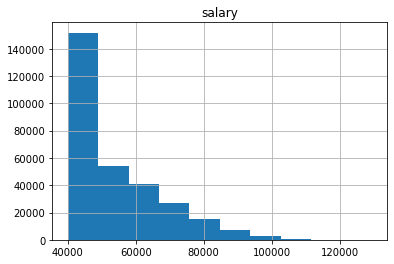

In [8]:
hist = salaries_df.hist(bins = 10)

In [9]:
sel =[Departments.dept_name, func.avg(Salaries.salary)]
dept_salaries = session.query(*sel).filter(Departments.dept_no==Dept_Emp.dept_no, Dept_Emp.emp_no==Salaries.emp_no).group_by(Departments.dept_name).all()

dept_salaries_df = pd.DataFrame(dept_salaries, columns=['Departments', 'Average Salaries'])
dept_salaries_df.set_index('Departments', inplace=True)
dept_salaries_df['Average Salaries'] = pd.to_numeric(dept_salaries_df['Average Salaries'])



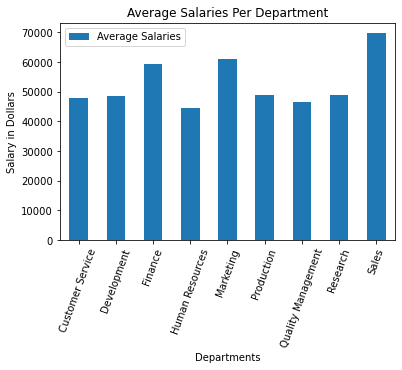

In [10]:
ax = dept_salaries_df.plot.bar(rot=70, title="Average Salaries Per Department")
ax.set_ylabel('Salary in Dollars')
plt.show()